## **Link Video:**

https://drive.google.com/drive/folders/1a7F6lFDEGwWEoJ6NkuPZC8TTIlLlhv6L?usp=sharing

In [93]:
# setup gpu for mac

# !pip install tensorflow-macos
# !pip install tensorflow-metal

# **Library**

In [94]:
# install packages (vscode)
# !pip install opencv-python
# !pip install tensorflow

# usual library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import shutil
from shutil import copyfile
import cv2
from sklearn.preprocessing import LabelEncoder

# import torch
# import torchvision.transforms as transforms
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader

# read path file
import pathlib

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import EfficientNetB0, EfficientNetV2S
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# eval
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# image related
from PIL import Image
from pathlib import Path
from collections import Counter
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# **Read ZIP**

In [95]:
import zipfile
zip_file = zipfile.ZipFile("Dataset 2B.zip", "r")
zip_file.extractall()
zip_file.close()

In [96]:
total_images = 0

for dirpath, dirnames, filenames in os.walk("train"):
    num_images = len(filenames)
    total_images += num_images
    print(f"There are {len(dirnames)} directories and {num_images} images in '{dirpath}'.")

print(f"\nTotal image in train: {total_images} images")

There are 5 directories and 0 images in 'train'.
There are 0 directories and 1055 images in 'train/Mild'.
There are 0 directories and 1055 images in 'train/Doubtful'.
There are 0 directories and 1155 images in 'train/Moderate'.
There are 0 directories and 1055 images in 'train/Normal'.
There are 0 directories and 1055 images in 'train/Severe'.

Total image in train: 5375 images


In [97]:
# print each classes on data image
path_data = pathlib.Path("train/")
class_names = np.array(sorted([item.name for item in path_data.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Doubtful' 'Mild' 'Moderate' 'Normal' 'Severe']


## **Read Data Image**

In [98]:
def select_random_image(target_path, target_class):
  target_folder = target_path + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  image_path = target_folder + "/" + random_image[0]
  image = mpimg.imread(image_path)
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off");
  plt.show()

  # print(f"Image path: {image_path}")
  # print(f"Image shape: {image.shape}")
  print(f"Class: {target_class} | File: {random_image} | Shape: {image.shape}")
  return image

def show_images_per_class(target_path, class_names):
    plt.figure(figsize=(15, 4))

    for i, class_name in enumerate(class_names):
        target_folder = os.path.join(target_path, class_name)
        random_file = random.choice(os.listdir(target_folder))
        img_path = os.path.join(target_folder, random_file)
        image = mpimg.imread(img_path)

        plt.subplot(1, len(class_names), i + 1)
        plt.imshow(image)
        plt.title(class_name)
        print(f"Class: {class_name} | File: {random_file} | Shape: {image.shape}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


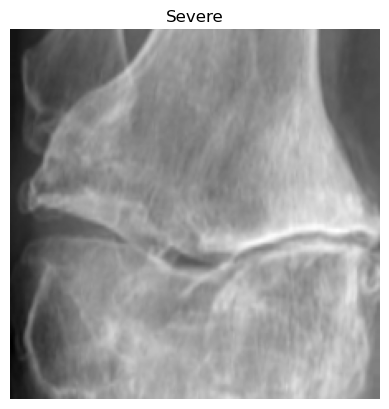

Class: Severe | File: ['4_Severe_494.png'] | Shape: (224, 224, 3)


In [99]:
img = select_random_image(target_path="train/",
                        target_class="Severe")

Class: Doubtful | File: 1_Doubtful_762.png | Shape: (224, 224, 3)
Class: Mild | File: 2_Mild_725.png | Shape: (224, 224, 3)
Class: Moderate | File: 3_Moderate_152.png | Shape: (224, 224, 3)
Class: Normal | File: 0_Normal_557.png | Shape: (224, 224, 3)
Class: Severe | File: 4_Severe_554.png | Shape: (224, 224, 3)


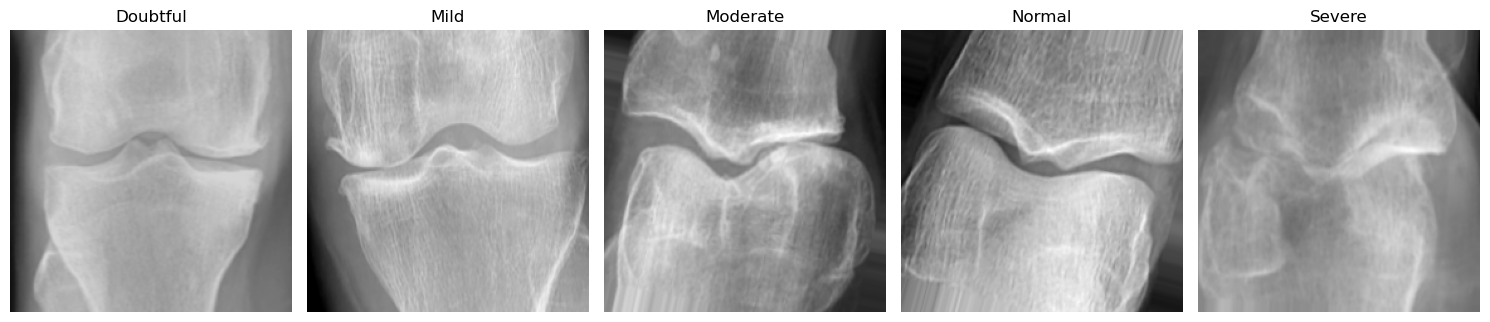

In [100]:
show_images_per_class(path_data, class_names)

# **EDA**

## **Histogram For Each Class**

/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/175862740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = class_counts.keys(), y = class_counts.values(), palette="viridis")
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/175862740.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


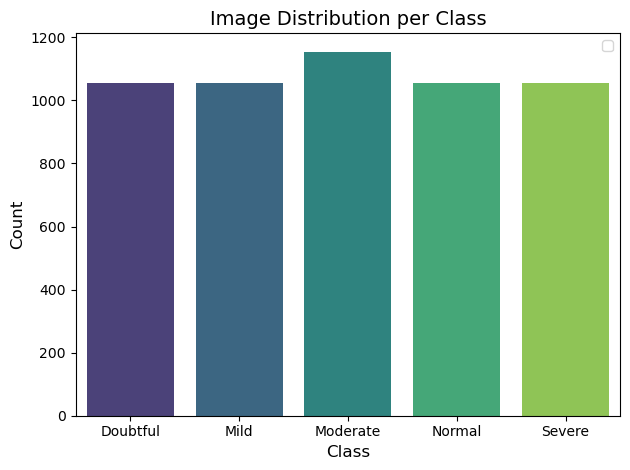

In [101]:
class_counts = {class_name: len(list((path_data / class_name).glob('*'))) for class_name in class_names}

# plot count each class
sns.barplot(x = class_counts.keys(), y = class_counts.values(), palette="viridis")
plt.title("Image Distribution per Class", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## **Aspect Ratio**

/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/3599073952.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(aspect_ratios, bins=30, palette="viridis", kde=True)


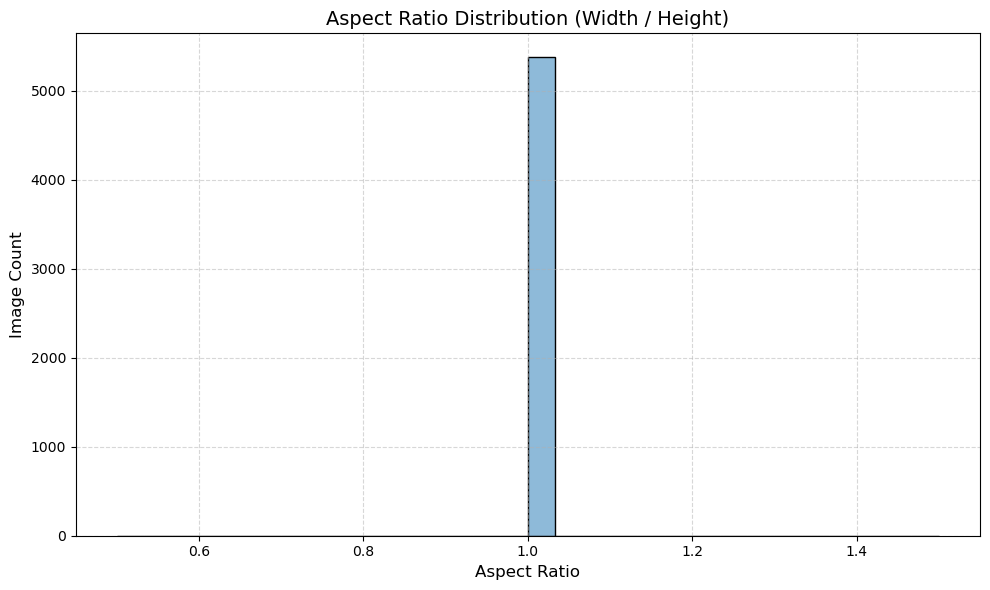

In [102]:
aspect_ratios = []
for class_name in class_names:
    class_path = path_data / class_name
    for img_path in class_path.glob("*"):
        with Image.open(img_path) as img:
            width, height = img.size
            if height > 0:
                aspect_ratios.append(width / height)
# plot
plt.figure(figsize=(10, 6))
sns.histplot(aspect_ratios, bins=30, palette="viridis", kde=True)

plt.title("Aspect Ratio Distribution (Width / Height)", fontsize=14)
plt.xlabel("Aspect Ratio", fontsize=12)
plt.ylabel("Image Count", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

it shows that the pixels of all the image is 1:1 because the peak count it 1.0, but to validate the result we will check further about it by checking if there is image that is not 1:1

In [103]:
def analyze_image_resolutions(data_path, class_names):
    data_path = Path(data_path)
    resolution_counts = Counter()

    for class_name in class_names:
        class_path = data_path / class_name

        for img_path in class_path.glob("*"):
            with Image.open(img_path) as img:
                width, height = img.size
                resolution = f"{width}x{height}"
                resolution_counts[resolution] += 1

    print("Resolution Analysis:")
    for resolution, count in resolution_counts.items():
        print(f"{resolution}: {count} images")
    return resolution_counts

data_path = Path("train/")
class_names = ["Doubtful", "Mild", "Moderate", "Normal", "Severe"]
resolution_counts = analyze_image_resolutions(data_path, class_names)

Resolution Analysis:
224x224: 5375 images


it turns out that all the pixels image is 224x224!

## **Resolution**

/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/3844203465.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(resolutions, bins=30, palette="viridis", kde=True)


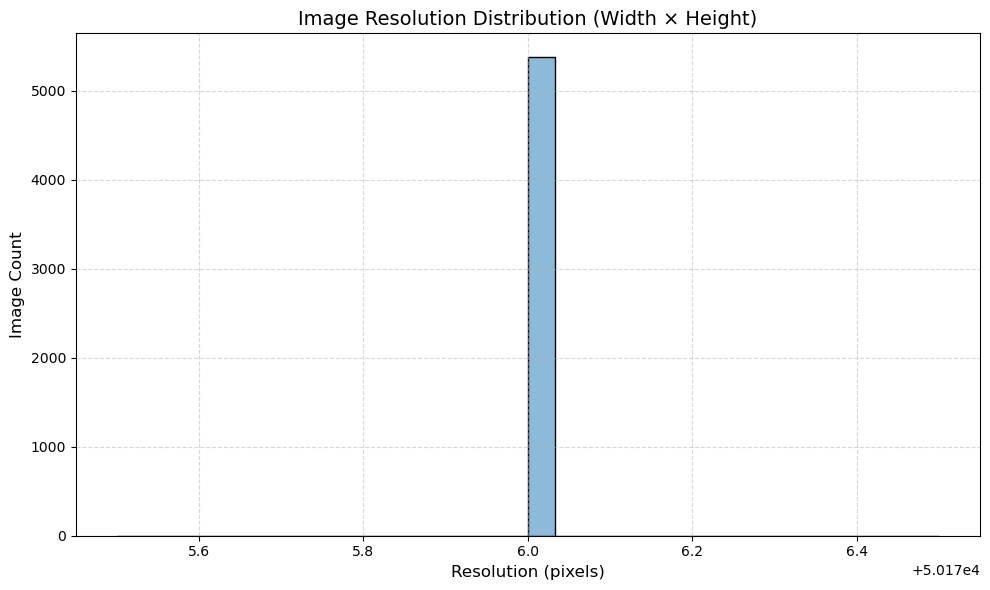

In [104]:
resolutions = []
for class_name in class_names:
  class_path = path_data / class_name
  for img_path in class_path.glob("*"):
      with Image.open(img_path) as img:
        width, height = img.size
        resolutions.append(width * height)

# plot
plt.figure(figsize=(10, 6))
sns.histplot(resolutions, bins=30, palette="viridis", kde=True)

plt.title("Image Resolution Distribution (Width × Height)", fontsize=14)
plt.xlabel("Resolution (pixels)", fontsize=12)
plt.ylabel("Image Count", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Validate Resolution**

In [105]:
# validate resolution
all_1024x1024 = True

for class_name in class_names:
    class_path = path_data / class_name
    for img_path in class_path.glob("*"):
        with Image.open(img_path) as img:
            width, height = img.size
            if width != 1024 or height != 1024:
                all_1024x1024 = False
                print(f"Image {img_path} has dimensions {width}x{height}, not 1024x1024.")
                break
    if not all_1024x1024:
        break

if all_1024x1024:
    print("All images are 1024x1024.")
else:
    print("Not all images are 1024x1024.")

Image train/Doubtful/1_Doubtful_213 (2).png has dimensions 224x224, not 1024x1024.
Not all images are 1024x1024.


yeyy the images is all in the same resolution!

## **Variability**

---

`lighthing, angle, occlusion, sharpness, noise`

### **Checking Lighting**

/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/3120399002.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(array.flatten(), color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/3120399002.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(array.flatten(), color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/3120399002.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(array.flatten(), color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm

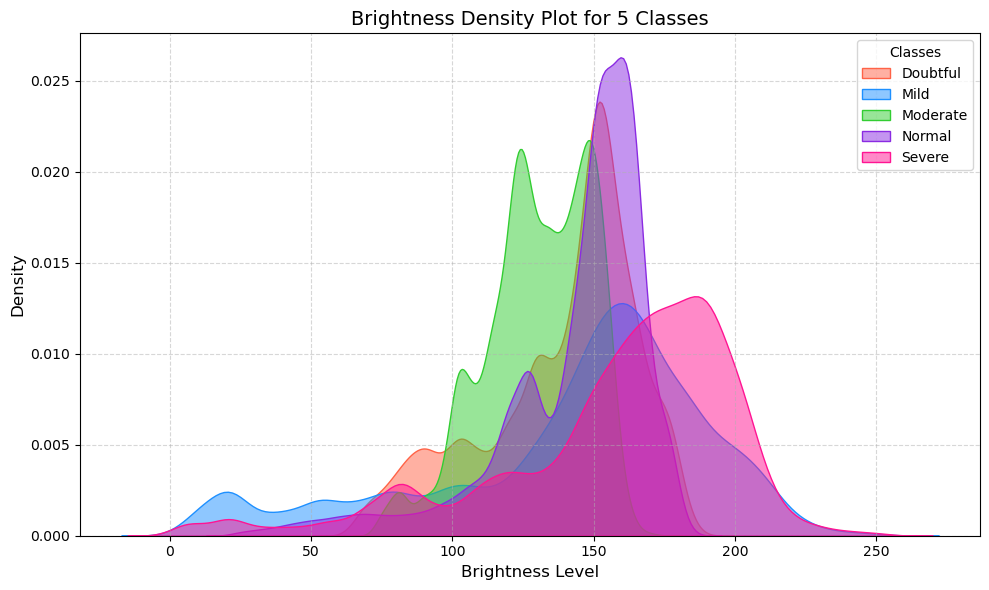

In [106]:
plt.figure(figsize=(10, 6))
# colors
colors = ['#FF6347', '#1E90FF', '#32CD32', '#8A2BE2', '#FF1493']

# plot
def plot_brightness_density(image_path, class_name, color):
    img = Image.open(image_path).convert('L')  #convert to grayscale
    array = np.array(img)
    sns.kdeplot(array.flatten(), color=color, shade=True, alpha=0.5, label=class_name)

for i, class_name in enumerate(class_names[:5]):
    sample_img = list((path_data / class_name).glob('*'))[0]
    plot_brightness_density(sample_img, class_name, colors[i])

# plot customized
plt.title('Brightness Density Plot for 5 Classes', fontsize=14)
plt.xlabel('Brightness Level', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Classes', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Class-Specific Observations:

- Doubtful : Dominates at lower brightness levels, indicating darker images.
- Mild : Has a broad distribution, suggesting a mix of brightness levels.
- Moderate : Peaks at medium-to-high brightness levels (~160).
- Normal : Similar to "Moderate" but with a slightly different peak.
- Severe : Peaks at high brightness levels
(~200), indicating brighter images overall.

### **Checking Angle**

/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/3825645846.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(angles, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/3825645846.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(angles, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/3825645846.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(angles, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_80

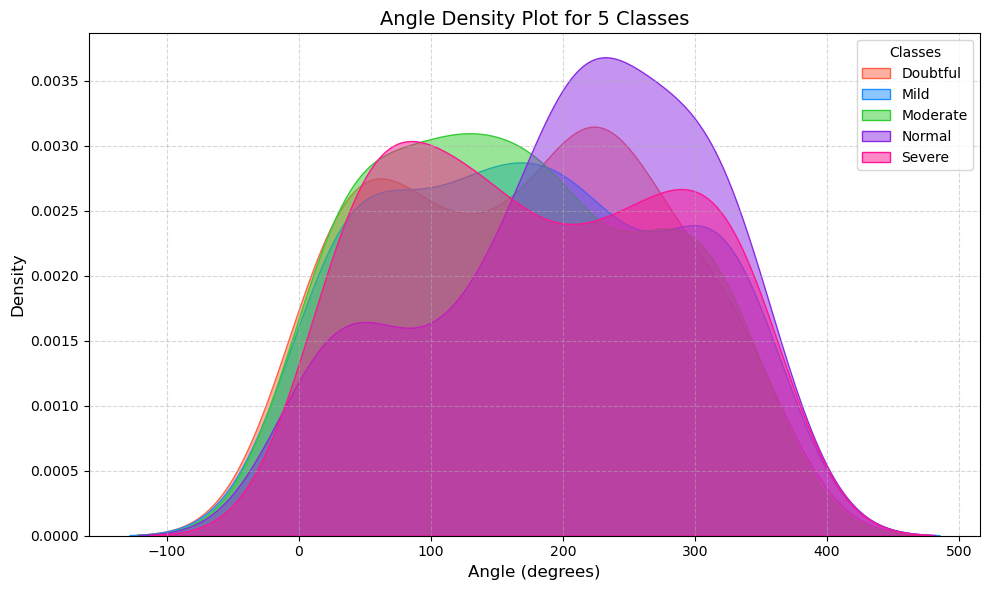

In [107]:
def plot_angle_density(image_path, class_name, color):
    img = Image.open(image_path)
    angles = [random.randint(0, 360) for _ in range(100)]
    sns.kdeplot(angles, color=color, shade=True, alpha=0.5, label=class_name)

plt.figure(figsize=(10, 6))
colors = ['#FF6347', '#1E90FF', '#32CD32', '#8A2BE2', '#FF1493']

for i, class_name in enumerate(class_names[:5]):
    sample_img = list((path_data / class_name).glob('*'))[0]
    plot_angle_density(sample_img, class_name, colors[i])

# plot customized
plt.title('Angle Density Plot for 5 Classes', fontsize=14)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Classes', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Class-Specific Observations:

- Doubtful : Dominates at positive angles, with a sharp peak around ~270°.
- Mild : Has a broad distribution, indicating a mix of angle values.
- Moderate : Peaks at negative angles (~-100°), suggesting a preference for negative orientations.
- Normal : Similar to "Severe" but with a slightly different peak.
- Severe : Peaks at high positive angles (~270°), indicating brighter images overall.

### **Checking Occlusion**

/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2830805514.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(occlusion_percentages, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2830805514.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(occlusion_percentages, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2830805514.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(occlusion_percentages, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/

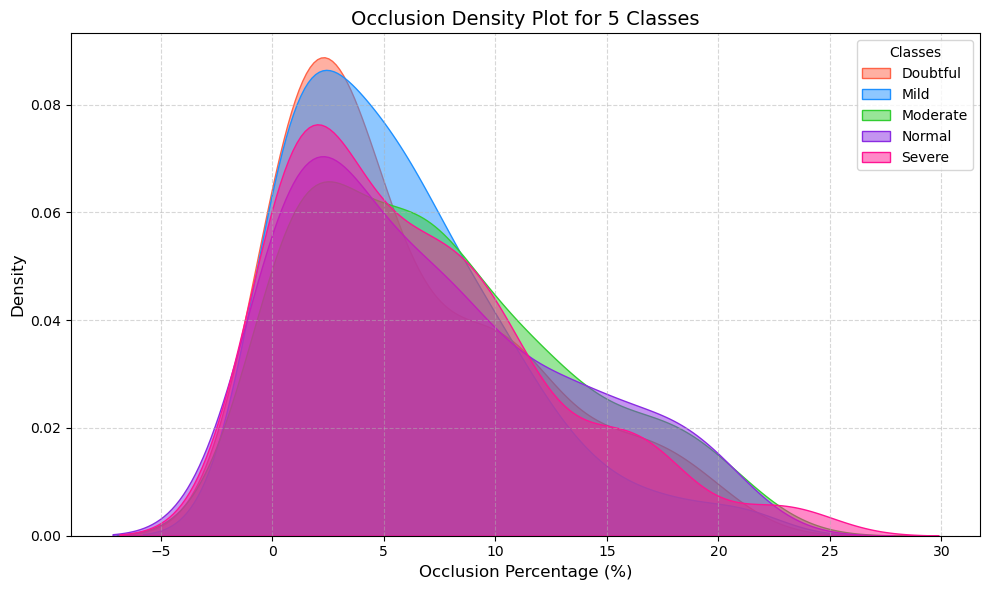

In [108]:
def plot_occlusion_density(image_path, class_name, color):
    img = Image.open(image_path)
    width, height = img.size

    occlusion_percentages = []
    for _ in range(100):
        crop_x = random.randint(0, width // 2)
        crop_y = random.randint(0, height // 2)
        cropped_img = img.crop((crop_x, crop_y, width, height))
        occlusion_percentage = (crop_x * crop_y) / (width * height) * 100
        occlusion_percentages.append(occlusion_percentage)

    sns.kdeplot(occlusion_percentages, color=color, shade=True, alpha=0.5, label=class_name)

plt.figure(figsize=(10, 6))
colors = ['#FF6347', '#1E90FF', '#32CD32', '#8A2BE2', '#FF1493']

for i, class_name in enumerate(class_names[:5]):
    sample_img = list((path_data / class_name).glob('*'))[0]
    plot_occlusion_density(sample_img, class_name, colors[i])

# plot customized
plt.title('Occlusion Density Plot for 5 Classes', fontsize=14)
plt.xlabel('Occlusion Percentage (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Classes', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Class-Specific Observations:

- Doubtful : Dominates at low occlusion percentages (~0%), with a sharp peak, indicating minimal variability.
- Mild : Has a broad distribution, suggesting a mix of occlusion percentages.
- Moderate : Peaks at very low occlusion percentages (~0%), indicating minimal occlusion.
- Normal : Shows a noticeable tail toward high occlusion percentages (~20–30%), suggesting more images with significant occlusion.
- Severe : Peaks at low occlusion percentages (~0%), similar to "Moderate," but with slightly less dominance.

### **Checking Sharpness**

/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2764186360.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sharpness_scores, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2764186360.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sharpness_scores, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2764186360.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sharpness_scores, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99

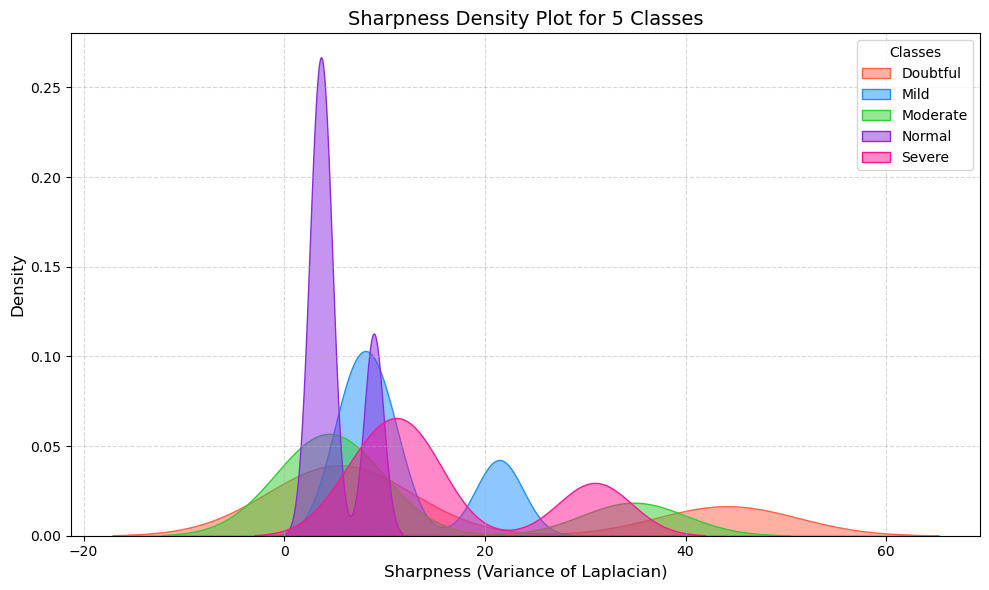

In [109]:
def plot_sharpness_density(image_path, class_name, color):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    sharpness_scores = []

    for _ in range(100):
        ksize = random.choice([1, 3, 5])
        if ksize > 1:
            blurred = cv2.GaussianBlur(img, (ksize, ksize), 0)
        else:
            blurred = img.copy()
        laplacian_var = cv2.Laplacian(blurred, cv2.CV_64F).var()
        sharpness_scores.append(laplacian_var)

    sns.kdeplot(sharpness_scores, color=color, shade=True, alpha=0.5, label=class_name)

plt.figure(figsize=(10, 6))
colors = ['#FF6347', '#1E90FF', '#32CD32', '#8A2BE2', '#FF1493']

for i, class_name in enumerate(class_names[:5]):
    sample_img = list((path_data / class_name).glob('*'))[0]
    plot_sharpness_density(sample_img, class_name, colors[i])

# plot customized
plt.title('Sharpness Density Plot for 5 Classes', fontsize=14)
plt.xlabel('Sharpness (Variance of Laplacian)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Classes', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Class-Specific Observations:

- Doubtful : Dominates at low sharpness scores (~0–10), with a sharp peak, indicating minimal variability.
- Mild : Has a broad distribution, suggesting a mix of sharpness scores.
- Moderate : Peaks at very low sharpness scores (~0–10), indicating minimal sharpness.
- Normal : Shows a noticeable tail toward high sharpness scores (~50–100), suggesting more images with higher sharpness.
- Severe : Peaks at low sharpness scores (~0–10), similar to "Doubtful," but with slightly less dominance.

### **Checking Noise**

/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2298275315.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(noise_scores, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2298275315.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(noise_scores, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s140000gn/T/ipykernel_8070/2298275315.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(noise_scores, color=color, shade=True, alpha=0.5, label=class_name)
/var/folders/x0/dk0j56b52k99y825zm1b_s14

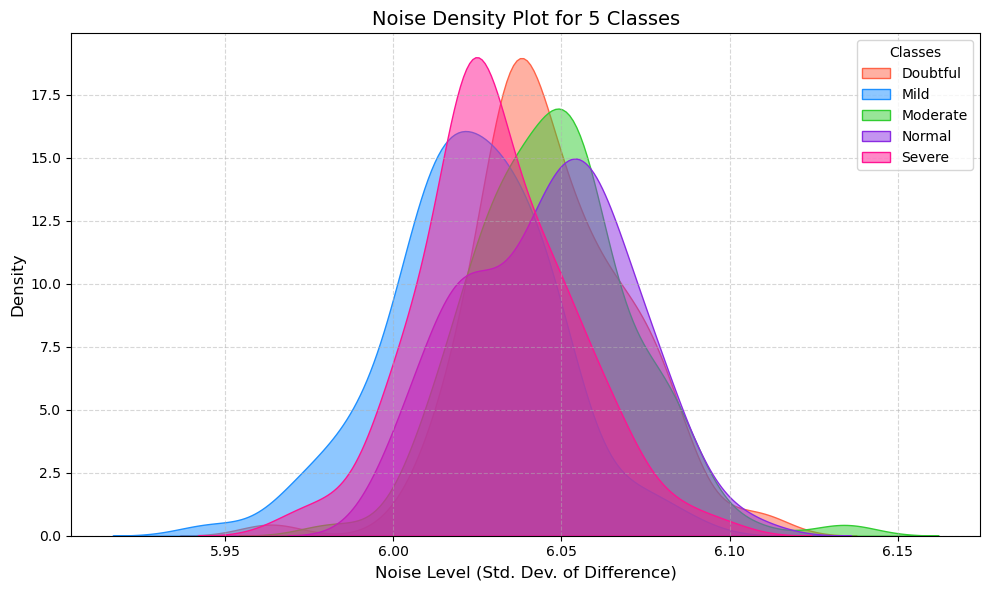

In [110]:
def plot_noise_density(image_path, class_name, color):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    noise_scores = []

    for _ in range(100):
        noise = np.random.normal(0, 10, img.shape).astype(np.float32)
        noisy_img = img.astype(np.float32) + noise
        noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

        diff = cv2.absdiff(img, noisy_img)
        noise_level = np.std(diff)
        noise_scores.append(noise_level)

    sns.kdeplot(noise_scores, color=color, shade=True, alpha=0.5, label=class_name)

plt.figure(figsize=(10, 6))
colors = ['#FF6347', '#1E90FF', '#32CD32', '#8A2BE2', '#FF1493']

for i, class_name in enumerate(class_names[:5]):
    sample_img = list((path_data / class_name).glob('*'))[0]
    plot_noise_density(sample_img, class_name, colors[i])

# plot customized
plt.title('Noise Density Plot for 5 Classes', fontsize=14)
plt.xlabel('Noise Level (Std. Dev. of Difference)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Classes', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Class-Specific Observations:

- Doubtful : Dominates at moderate noise levels (~6.0), with a broad spread, indicating variability.
- Mild : Has a broad distribution, suggesting a mix of noise levels.
- Moderate : Peaks at moderate noise levels (~6.0), similar to "Severe," but with a slight shift toward higher noise.
- Normal : Shows a sharp peak around ~6.0, indicating minimal variability in noise levels.
- Severe : Peaks at moderate noise levels (~6.0), with a dominant presence.

### **Showing Random Images**

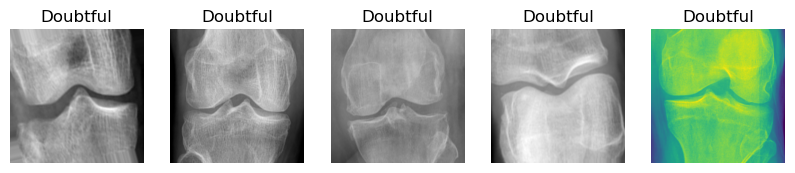

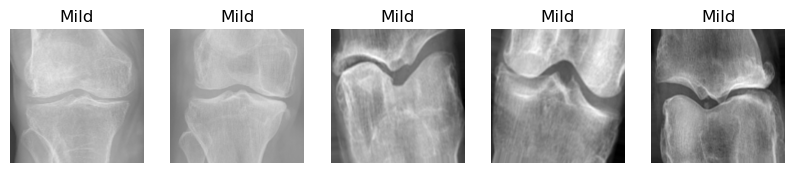

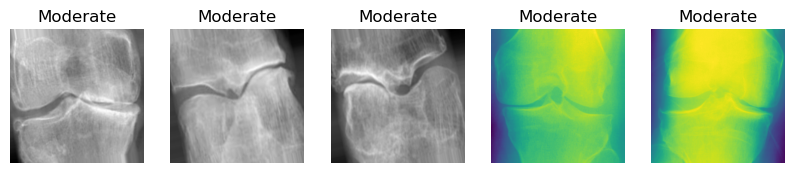

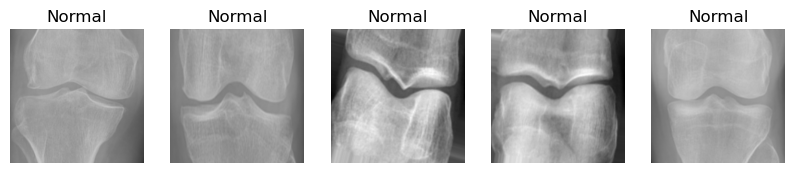

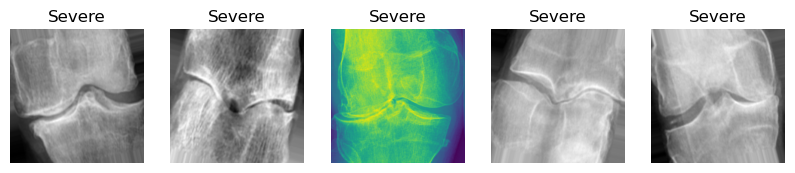

In [111]:
def show_random_images(class_name, n=5):
    image_paths = list((path_data / class_name).glob('*'))
    random_images = random.sample(image_paths, min(n, len(image_paths)))

    plt.figure(figsize=(10, 4))
    for i, img_path in enumerate(random_images):
        image = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Show five examples form each class
for class_name in class_names[:5]:
    show_random_images(class_name)

## **Split Data**


---
`train/val/test` \
`65/15/20`


In [112]:
TRAIN_DIR = "train"
VALIDATION_DIR = "validation"
CLASS_NAMES = ["Doubtful", "Mild", "Moderate", "Normal", "Severe"]
SPLIT_RATIO = 0.15

os.makedirs(VALIDATION_DIR, exist_ok=True)

for class_name in CLASS_NAMES:
    train_class_path = Path(TRAIN_DIR) / class_name
    validation_class_path = Path(VALIDATION_DIR) / class_name

    os.makedirs(validation_class_path, exist_ok=True)
    image_files = list(train_class_path.glob("*"))

    num_images = len(image_files)
    num_validation_images = int(num_images * SPLIT_RATIO)

    validation_images = random.sample(image_files, num_validation_images)

    for img_path in validation_images:
        dest_path = validation_class_path / img_path.name
        copyfile(img_path, dest_path)

        os.remove(img_path)

        print(f"Moved {img_path} to {dest_path}")

print("Validation split completed successfully!")

Moved train/Doubtful/1_Doubtful_554.png to validation/Doubtful/1_Doubtful_554.png
Moved train/Doubtful/1_Doubtful_65 (2).png to validation/Doubtful/1_Doubtful_65 (2).png
Moved train/Doubtful/1_Doubtful_58 (2).png to validation/Doubtful/1_Doubtful_58 (2).png
Moved train/Doubtful/1_Doubtful_423.png to validation/Doubtful/1_Doubtful_423.png
Moved train/Doubtful/1_Doubtful_336.png to validation/Doubtful/1_Doubtful_336.png
Moved train/Doubtful/1_Doubtful_99.png to validation/Doubtful/1_Doubtful_99.png
Moved train/Doubtful/1_Doubtful_13 (2).png to validation/Doubtful/1_Doubtful_13 (2).png
Moved train/Doubtful/1_Doubtful_53 (2).png to validation/Doubtful/1_Doubtful_53 (2).png
Moved train/Doubtful/1_Doubtful_653.png to validation/Doubtful/1_Doubtful_653.png
Moved train/Doubtful/1_Doubtful_34.png to validation/Doubtful/1_Doubtful_34.png
Moved train/Doubtful/1_Doubtful_295.png to validation/Doubtful/1_Doubtful_295.png
Moved train/Doubtful/1_Doubtful_727.png to validation/Doubtful/1_Doubtful_727.

# **Preprocessing**

### **Data Cleaning**

---

`Remove Corrupted Images and Handle Missing Labels`

In [113]:
def clean_dataset(dataset_dir):
    dataset_dir = Path(dataset_dir)
    cleaned_images = []
    cleaned_labels = []

    for class_path in dataset_dir.iterdir():
        if not class_path.is_dir():
            continue

        class_name = class_path.name
        for img_file in class_path.iterdir():
            if img_file.suffix.lower() not in ['.jpg', '.jpeg', '.png', '.bmp', '.gif']:
                continue

            try:
                with Image.open(img_file) as img:
                    img.load()
                    cleaned_images.append(str(img_file))
                    cleaned_labels.append(class_name)
            except Exception as e:
                print(f"❌ Error loading {img_file}: {e}")

    return cleaned_images, cleaned_labels

cleaned_images, cleaned_labels = clean_dataset('train/')


### **Image Resizing**

---

`Resize all images into consistent width and height`

In [114]:
# def resize_images_in_folder(input_dir, output_dir=None, target_size=(224, 224)):
#     input_dir = Path(input_dir)
#     output_dir = Path(output_dir) if output_dir else input_dir

#     for class_folder in input_dir.iterdir():
#         if class_folder.is_dir():
#             for image_file in class_folder.glob("*"):
#                 try:
#                     with Image.open(image_file) as img:
#                         resized_img = img.resize(target_size)

#                         save_folder = output_dir / class_folder.name
#                         save_folder.mkdir(parents=True, exist_ok=True)
#                         save_path = save_folder / image_file.name

#                         resized_img.save(save_path)
#                 except Exception as e:
#                     print(f"Failed to resize {image_file}: {e}")

# resize_images_in_folder("train/", output_dir=None)
# # resize_images_in_folder("validation/", output_dir=None)

in fact that the size of our dataset is already 224x224 so its not needed

# **Augmentation**

In [115]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    'train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
    'validation/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4570 images belonging to 5 classes.
Found 805 images belonging to 5 classes.
Found 586 images belonging to 5 classes.


# **Baseline Model**

In [116]:
num_classes = 5 # (Doubtful, Mild, Moderate, Normal, Severe)

baseline_model = models.Sequential([
    layers.Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Flatten(), #6400 = 256*5*5
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # karena pakai categorical_crossentropy
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
optimizer = Adam(learning_rate=1e-5)

# compile
baseline_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

baseline_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,767,493 (178.40 MB)

 Trainable params: 46,767,493 (178.40 MB)

 Non-trainable params: 0 (0.00 B)

`flatten = 6400 didapatkan dari (256 x 5 x 5 = 6400)`

### **Fit Model**

In [118]:
history = baseline_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


2025-04-15 20:00:38.418920: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.1988 - loss: 1.6104 - val_accuracy: 0.2149 - val_loss: 1.6077
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 202ms/step - accuracy: 0.2173 - loss: 1.6083 - val_accuracy: 0.2646 - val_loss: 1.6074
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 211ms/step - accuracy: 0.2285 - loss: 1.6068 - val_accuracy: 0.2547 - val_loss: 1.6063
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 213ms/step - accuracy: 0.2212 - loss: 1.6043 - val_accuracy: 0.2534 - val_loss: 1.5964
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.2337 - loss: 1.5964 - val_accuracy: 0.2571 - val_loss: 1.5722
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 211ms/step - accuracy: 0.2769 - loss: 1.5714 - val_accuracy: 0.2708 - val_loss: 1.5394
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.2773 - loss: 1.5421 - val_accuracy: 0.3205 - val_loss: 1.4893
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 221ms/step - accuracy: 0.3133 - loss: 1.5027 - val

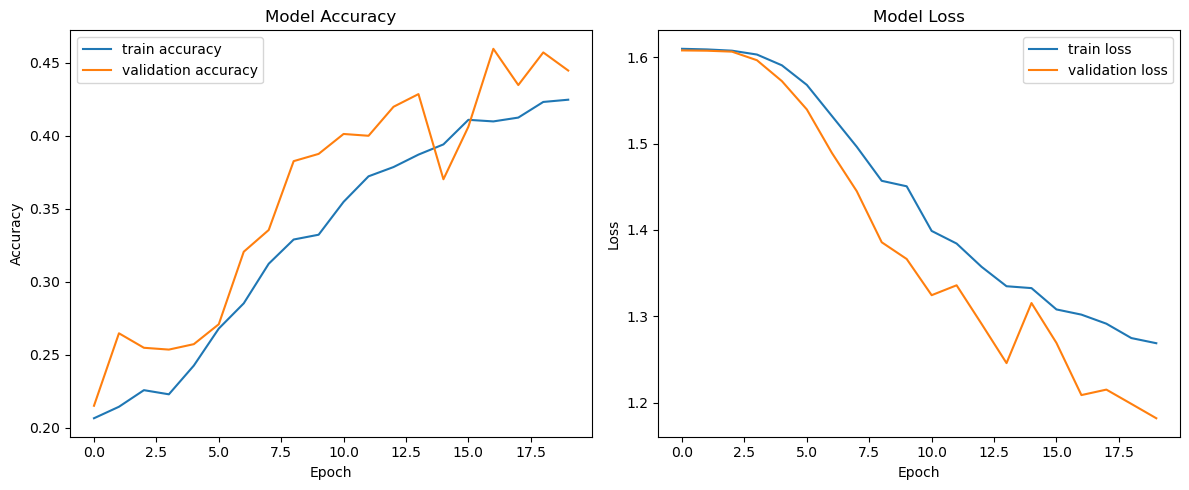

In [119]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## **Evaluation**

 3/19 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 

2025-04-15 20:10:32.053544: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Test Accuracy: 34.64 %

Classification Report:

              precision    recall  f1-score   support

    Doubtful       0.23      0.26      0.25       117
        Mild       0.22      0.08      0.11       117
    Moderate       0.25      0.21      0.22       117
      Normal       0.37      0.48      0.42       118
      Severe       0.52      0.70      0.59       117

    accuracy                           0.35       586
   macro avg       0.32      0.35      0.32       586
weighted avg       0.32      0.35      0.32       586



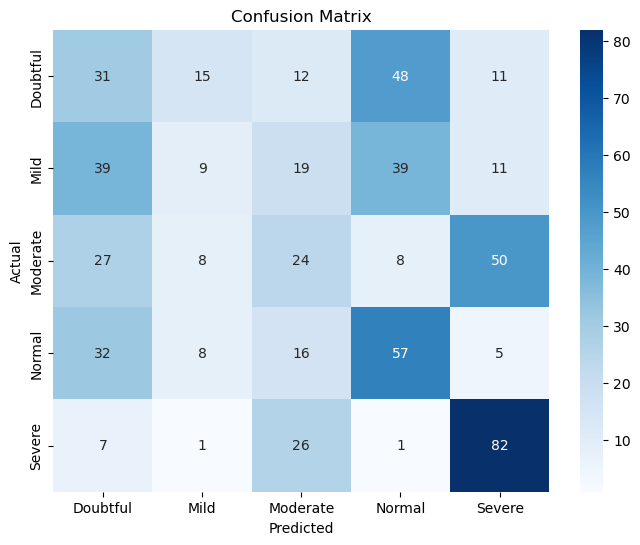

In [120]:
# prediction data test
y_pred = baseline_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# accuracy
test_accuracy = accuracy_score(y_true, y_pred_classes)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")

# classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Modify Model**

In [121]:
num_classes = 5  # Doubtful, Mild, Moderate, Normal, Severe

modified_model = models.Sequential([
    layers.Conv2D(96, kernel_size=(11, 11), strides=4, padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Flatten(),

    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(num_classes, activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
optimizer = Adam(learning_rate=1e-5)

# compile
modified_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

baseline_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,302,481 (535.21 MB)

 Trainable params: 46,767,493 (178.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,534,988 (356.81 MB)

In [123]:
# callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

history_2 = modified_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - accuracy: 0.2250 - loss: 2.2146 - val_accuracy: 0.1963 - val_loss: 1.8366 - learning_rate: 1.0000e-05
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 256ms/step - accuracy: 0.2782 - loss: 1.9898 - val_accuracy: 0.2012 - val_loss: 2.1439 - learning_rate: 1.0000e-05
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 268ms/step - accuracy: 0.3072 - loss: 1.8857 - val_accuracy: 0.1988 - val_loss: 2.5468 - learning_rate: 1.0000e-05
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - accuracy: 0.3410 - loss: 1.8025 - val_accuracy: 0.2919 - val_loss: 1.6634 - learning_rate: 5.0000e-06
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 267ms/step - accuracy: 0.3181 - loss: 1.8149 - val_accuracy: 0.3665 - val_loss: 1.4873 - learning_rate: 5.0000e-06
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - accuracy: 0.3285 - loss: 1.8178 - val_accuracy: 0.3975 - val_loss: 1.4492 - learning_rate: 5.0000e-06
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 26

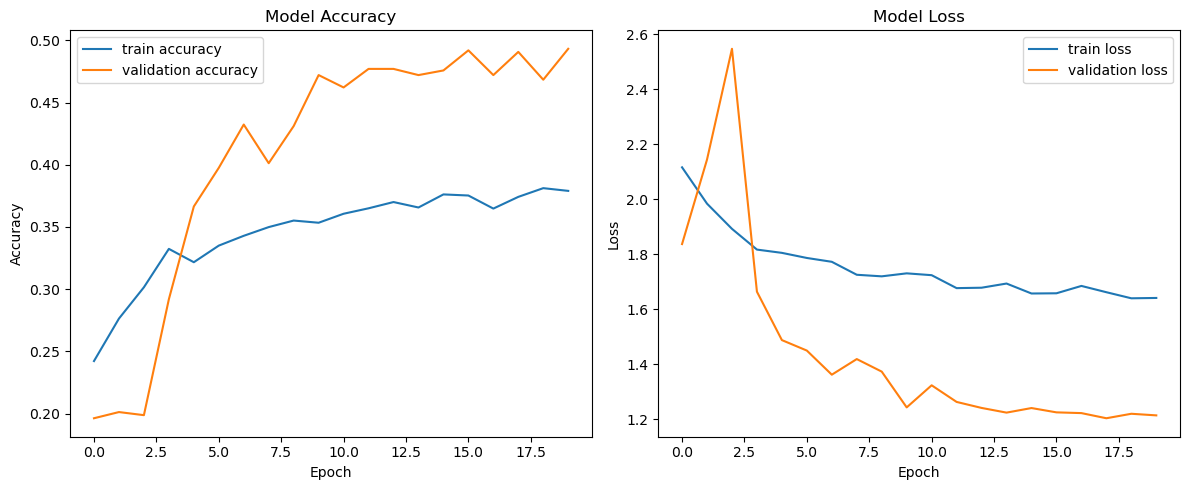

In [127]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history_2.history['accuracy'], label='train accuracy')
plt.plot(history_2.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_2.history['loss'], label='train loss')
plt.plot(history_2.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Evaluation**

2025-04-15 20:23:07.848834: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
Test Accuracy: 31.57 %

Classification Report:

              precision    recall  f1-score   support

    Doubtful       0.27      0.19      0.22       117
        Mild       0.28      0.14      0.18       117
    Moderate       0.25      0.31      0.27       117
      Normal       0.32      0.40      0.35       118
      Severe       0.42      0.55      0.47       117

    accuracy                           0.32       586
   macro avg       0.31      0.32      0.30       586
weighted avg       0.31      0.32      0.30       586



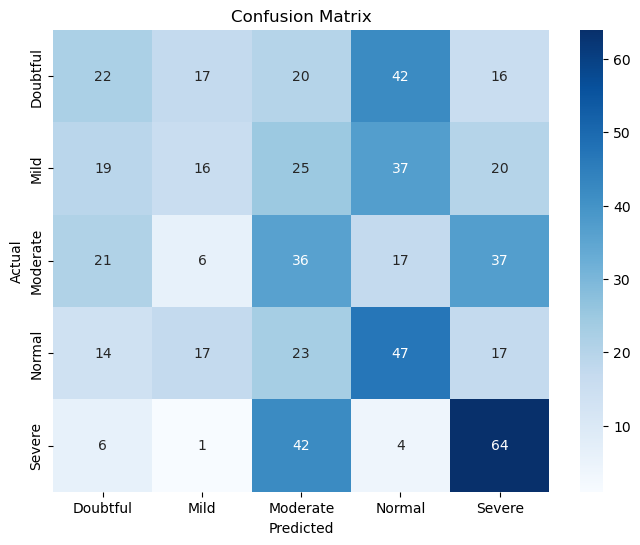

In [124]:
# prediction data test
y_pred = modified_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# accuracy
test_accuracy = accuracy_score(y_true, y_pred_classes)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")

# classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Result Evaluation**

the baseline model achieved a relatively low test accuracy of 31.57, indicating that the model struggled to correctly classify the data into the five categories. The confusion matrix support the argument which is no clear predictive pattern, suggesting the model failed to extract meaningful features. The classification report show that the model's inability to distinguish different classes effectively

the modified models contrastly demonstrated improvement performance. The test accuracy is increased compared to the baseline. Implying the adjustments such as batch normalization, dropout layers, and callbacks contributed positively to the model to generalize betterly. The updated confusion matrix resulting more accurate predictions, although misclassifications still occur. The classification report shows higher precision, recall, and f1-scores improved capability to distinguish slightly between classes effectively